In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [ ]:
wine = load_wine()

# store the feature matrix (X) and response vector (y) 
x = wine.data 
y = wine.target

# splitting X and y into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42,shuffle = True, stratify = y)

In [ ]:
x_train

array([[1.375e+01, 1.730e+00, 2.410e+00, ..., 1.150e+00, 2.900e+00,
        1.320e+03],
       [1.373e+01, 1.500e+00, 2.700e+00, ..., 1.190e+00, 2.710e+00,
        1.285e+03],
       [1.328e+01, 1.640e+00, 2.840e+00, ..., 1.090e+00, 2.780e+00,
        8.800e+02],
       ...,
       [1.311e+01, 1.900e+00, 2.750e+00, ..., 6.100e-01, 1.330e+00,
        4.250e+02],
       [1.225e+01, 4.720e+00, 2.540e+00, ..., 7.500e-01, 1.270e+00,
        7.200e+02],
       [1.264e+01, 1.360e+00, 2.020e+00, ..., 9.800e-01, 1.590e+00,
        4.500e+02]])

In [ ]:
y_train

array([0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2,
       1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1,
       1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1])

In [ ]:
def classwise_distribution (arr):
  unique_elements, counts_elements = np.unique(arr, return_counts=True)
  plt.bar(unique_elements, counts_elements, 1)
  plt.title('Class Frequency')
  plt.xlabel('Class')
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
def fit(X, Y):

  X = pd.DataFrame(X, columns=wine.feature_names)
  Y = pd.DataFrame(Y).loc[:,0]

  mean = X.groupby(by=Y).mean()
  var = X.groupby(by=Y).var()
  
  mean = np.array(mean)
  var = np.array(var)

  return mean, var

def cond_prob_xC (v, mean, var):
  prob = (1/np.sqrt(2*np.pi*var))*np.exp(-1*np.square(v - mean)/(2*var))
  return prob

def pri_prob (y_train):
  val, count = np.unique(y_train, return_counts=True)
  pri_prob = (count/len(y_train)).reshape((len(val), 1))
  return pri_prob

def po_prob (prob, prior_prob):
  prob = np.prod(prob, axis = 1).reshape((3,1))
  post_prob = prob * prior_prob
  return post_prob



In [ ]:
def predict(x_train, y_train, x_test, y_test ):
  print('class-wise distribution of Training Set')
  classwise_distribution (y_train)
  print('=============================')
  print('class-wise distribution of Test Set')
  classwise_distribution (y_test)
  print('=============================')

  print('Initiating Prediction')
  print('=============================')


  mean, var = fit(x_train, y_train)
  print("Mean of the training data is")
  print(mean)
  print('Varince of the training data is')
  print(var)


  print('=============================')
  print('Calculating Prior Probability')
  prior_prob = pri_prob(y_train)
  print("Prior Probability of training data is")
  print(prior_prob)


  print('=============================')
  y_score = np.zeros((len(y_test), (len(np.unique(y_test)))))
  pred = np.zeros(shape=(1, len(x_test)))
  for i in range (len(x_test)):
    cond_prob = cond_prob_xC (x_test[i], mean, var)
    post_prob = po_prob (cond_prob, prior_prob)
    y_score[i] = post_prob.reshape(3,)
    result, _ = np.where(post_prob == np.amax(post_prob))
    pred[0][i] = result
  print("Prediction on the training data is as follows")
  print(pred)

  print('=============================')
  print("Calculating Accuracy")
  truth = pred == y_test
  count = np.count_nonzero(truth)
  acc = (count/len(y_test)) * 100
  print("Accuracy achieved is:", acc)


  print("=============================")
  print("Printing confusion matrix")
  print(confusion_matrix(y_test, pred.reshape(len(y_test),)))

  return pred.reshape(len(y_test),)

class-wise distribution of Training Set


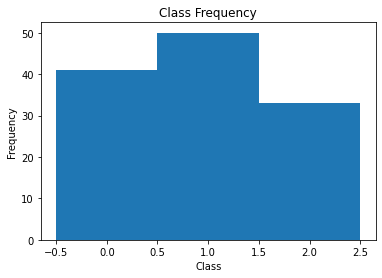

class-wise distribution of Test Set


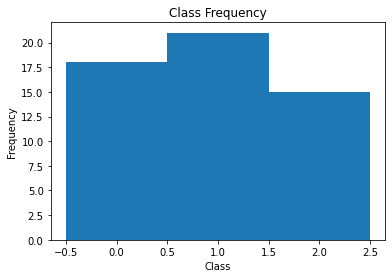

Initiating Prediction
Mean of the training data is
[[1.37304878e+01 1.94707317e+00 2.44975610e+00 1.71024390e+01
  1.06634146e+02 2.82853659e+00 2.94024390e+00 3.01707317e-01
  1.85121951e+00 5.56780488e+00 1.05097561e+00 3.08853659e+00
  1.11280488e+03]
 [1.22424000e+01 1.96260000e+00 2.23280000e+00 2.05240000e+01
  9.51400000e+01 2.25360000e+00 2.04680000e+00 3.50800000e-01
  1.71220000e+00 2.96080000e+00 1.05892000e+00 2.80220000e+00
  5.31260000e+02]
 [1.30745455e+01 3.20090909e+00 2.45424242e+00 2.15606061e+01
  9.92727273e+01 1.68757576e+00 7.87575758e-01 4.46363636e-01
  1.13878788e+00 7.36272724e+00 6.73030303e-01 1.69060606e+00
  6.24393939e+02]]
Varince of the training data is
[[2.08024756e-01 4.05656220e-01 6.21124390e-02 7.47774390e+00
  1.19187805e+02 1.17752805e-01 1.41067439e-01 5.52951220e-03
  1.50045976e-01 1.52011756e+00 1.29790244e-02 1.11587805e-01
  4.07188110e+04]
 [2.75557388e-01 1.13044412e+00 8.04940408e-02 1.08014531e+01
  3.54694286e+02 3.03276571e-01 3.7416

In [ ]:
pred = predict(x_train, y_train, x_test, y_test )

In [ ]:
def predict_1(x_train, y_train, x_test, y_test ):
  print('class-wise distribution of Training Set')
  classwise_distribution (y_train)
  print('=============================')
  print('class-wise distribution of Test Set')
  classwise_distribution (y_test)
  print('=============================')

  print('Initiating Prediction')
  print('=============================')


  mean, var = fit(x_train, y_train)
  print("Mean of the training data is")
  print(mean)
  print('Varince of the training data is')
  print(var)


  print('=============================')
  print('Calculating Prior Probability')
  prior_prob = np.array([[40],
                         [40],
                         [20]])
  print("Prior Probability of training data is")
  print(prior_prob)


  print('=============================')
  y_score = np.zeros((len(y_test), (len(np.unique(y_test)))))
  pred = np.zeros(shape=(1, len(x_test)))
  for i in range (len(x_test)):
    cond_prob = cond_prob_xC (x_test[i], mean, var)
    post_prob = po_prob (cond_prob, prior_prob)
    y_score[i] = post_prob.reshape(3,)
    result, _ = np.where(post_prob == np.amax(post_prob))
    pred[0][i] = result
  print("Prediction on the training data is as follows")
  print(pred)

  print('=============================')
  print("Calculating Accuracy")
  truth = pred == y_test
  count = np.count_nonzero(truth)
  acc = (count/len(y_test)) * 100
  print("Accuracy achieved is:", acc)


  print("=============================")
  print("Printing confusion matrix")
  print(confusion_matrix(y_test, pred.reshape(len(y_test),)))

  return pred.reshape(len(y_test),)

class-wise distribution of Training Set


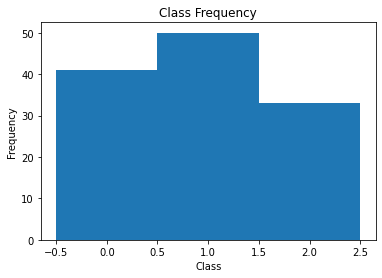

class-wise distribution of Test Set


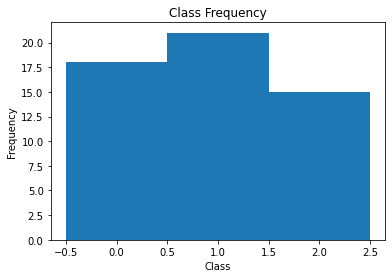

Initiating Prediction
Mean of the training data is
[[1.37304878e+01 1.94707317e+00 2.44975610e+00 1.71024390e+01
  1.06634146e+02 2.82853659e+00 2.94024390e+00 3.01707317e-01
  1.85121951e+00 5.56780488e+00 1.05097561e+00 3.08853659e+00
  1.11280488e+03]
 [1.22424000e+01 1.96260000e+00 2.23280000e+00 2.05240000e+01
  9.51400000e+01 2.25360000e+00 2.04680000e+00 3.50800000e-01
  1.71220000e+00 2.96080000e+00 1.05892000e+00 2.80220000e+00
  5.31260000e+02]
 [1.30745455e+01 3.20090909e+00 2.45424242e+00 2.15606061e+01
  9.92727273e+01 1.68757576e+00 7.87575758e-01 4.46363636e-01
  1.13878788e+00 7.36272724e+00 6.73030303e-01 1.69060606e+00
  6.24393939e+02]]
Varince of the training data is
[[2.08024756e-01 4.05656220e-01 6.21124390e-02 7.47774390e+00
  1.19187805e+02 1.17752805e-01 1.41067439e-01 5.52951220e-03
  1.50045976e-01 1.52011756e+00 1.29790244e-02 1.11587805e-01
  4.07188110e+04]
 [2.75557388e-01 1.13044412e+00 8.04940408e-02 1.08014531e+01
  3.54694286e+02 3.03276571e-01 3.7416

In [ ]:
pred = predict_1(x_train, y_train, x_test, y_test )

In [ ]:
def predict_2(x_train, y_train, x_test, y_test ):
  print('class-wise distribution of Training Set')
  classwise_distribution (y_train)
  print('=============================')
  print('class-wise distribution of Test Set')
  classwise_distribution (y_test)
  print('=============================')

  print('Initiating Prediction')
  print('=============================')


  mean, var = fit(x_train, y_train)
  print("Mean of the training data is")
  print(mean)
  print('Varince of the training data is')
  print(var)


  print('=============================')
  print('Calculating Prior Probability')
  prior_prob = np.array([[80],
                         [100],
                         [100]])
  print("Prior Probability of training data is")
  print(prior_prob)


  print('=============================')
  y_score = np.zeros((len(y_test), (len(np.unique(y_test)))))
  pred = np.zeros(shape=(1, len(x_test)))
  for i in range (len(x_test)):
    cond_prob = cond_prob_xC (x_test[i], mean, var)
    post_prob = po_prob (cond_prob, prior_prob)
    y_score[i] = post_prob.reshape(3,)
    result, _ = np.where(post_prob == np.amax(post_prob))
    pred[0][i] = result
  print("Prediction on the training data is as follows")
  print(pred)

  print('=============================')
  print("Calculating Accuracy")
  truth = pred == y_test
  count = np.count_nonzero(truth)
  acc = (count/len(y_test)) * 100
  print("Accuracy achieved is:", acc)


  print("=============================")
  print("Printing confusion matrix")
  print(confusion_matrix(y_test, pred.reshape(len(y_test),)))

  return pred.reshape(len(y_test),)

class-wise distribution of Training Set


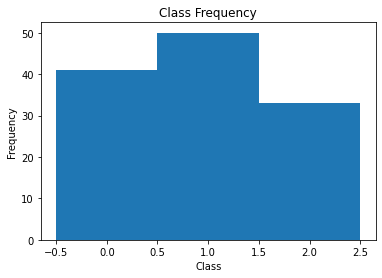

class-wise distribution of Test Set


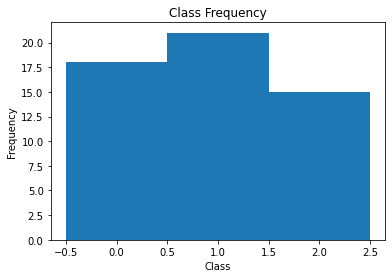

Initiating Prediction
Mean of the training data is
[[1.37304878e+01 1.94707317e+00 2.44975610e+00 1.71024390e+01
  1.06634146e+02 2.82853659e+00 2.94024390e+00 3.01707317e-01
  1.85121951e+00 5.56780488e+00 1.05097561e+00 3.08853659e+00
  1.11280488e+03]
 [1.22424000e+01 1.96260000e+00 2.23280000e+00 2.05240000e+01
  9.51400000e+01 2.25360000e+00 2.04680000e+00 3.50800000e-01
  1.71220000e+00 2.96080000e+00 1.05892000e+00 2.80220000e+00
  5.31260000e+02]
 [1.30745455e+01 3.20090909e+00 2.45424242e+00 2.15606061e+01
  9.92727273e+01 1.68757576e+00 7.87575758e-01 4.46363636e-01
  1.13878788e+00 7.36272724e+00 6.73030303e-01 1.69060606e+00
  6.24393939e+02]]
Varince of the training data is
[[2.08024756e-01 4.05656220e-01 6.21124390e-02 7.47774390e+00
  1.19187805e+02 1.17752805e-01 1.41067439e-01 5.52951220e-03
  1.50045976e-01 1.52011756e+00 1.29790244e-02 1.11587805e-01
  4.07188110e+04]
 [2.75557388e-01 1.13044412e+00 8.04940408e-02 1.08014531e+01
  3.54694286e+02 3.03276571e-01 3.7416

In [ ]:
pred = predict_2(x_train, y_train, x_test, y_test )